# <机器学习>课程 Lecture 2实验


## 线性回归模型

给定一组数据,其输入数据维度为1,输出数据维度为1.
请分别通过最小二乘法,梯度下降法和模拟退火法来拟合.

首先定义基类模型.

如果不带有偏置项,即为$y = w^T x$, 如果带有偏置项为$y = w^Tx + b$.

计算损失使用MSE损失,即$l = \frac{1}{2N} \sum_{i} (\hat y_i - y_i)^2$.

In [4]:
import numpy as np

class LinearRegressor():
    """
    线性回归模型
    """
    def __init__(self,
        c_in: int, c_out:int,
        init_mean: float, init_var: float,
        bias: bool = True
    ) -> None:
        '''
        c_in: 输入数据维度
        c_out: 输出数据维度
        init_mean: 初始化均值
        init_var: 初始化方差
        bias: 是否带有偏置项
        '''
        self.c_in = c_in
        self.c_out = c_out
        self.bias = bias

        if self.bias:
            weight_size = (c_in+1, c_out)
        else:
            weight_size = (c_in, c_out)

        # 初始化参数
        self.weight = np.random.normal(
            init_mean, init_var,
            size=weight_size)

    def predict(self, 
        x: np.ndarray,
        weight: np.ndarray=None
    )->np.ndarray:
        b = x.shape[0]
        if self.bias and x.shape[1] == self.c_in:
            x = np.concatenate([x, np.ones((b, 1))], axis=1)

        if weight is None:
            return np.matmul(x, self.weight)
        else:
            return np.matmul(x, weight)

    def mse_loss(self, 
        x:np.ndarray, 
        y:np.ndarray,
        weight: np.ndarray=None
    )-> np.ndarray:
        b = x.shape[0]
        if self.bias and x.shape[1] == self.c_in:
            x = np.concatenate([x, np.ones((b, 1))], axis=1)

        y_hat = self.predict(x, weight)
        loss_val = np.sum((y_hat - y) ** 2) / (2 * b)

        return loss_val


从文件中读取数据用于后续实验.

In [5]:
from sklearn.model_selection import train_test_split

data_filename = "linear_data_0302_1217.npy"
linear_data = np.load(data_filename)
x_data, y_data = linear_data[0, :, np.newaxis], linear_data[1, :, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True
)

# x_data in [b, c_in]
c_in = x_data.shape[1]
# y_data in [b, c_out]
c_out = y_data.shape[1]

### 最小二乘法

请补充代码,完成最小二乘法拟合的线性回归模型.

权重计算为$w = (x^Tx)^{-1}x^Ty$.

In [15]:

class LeastSquareRegressor(LinearRegressor):
    """
    使用最小二乘法拟合线性模型
    """
    def __init__(self,
        c_in: int, c_out: int,
        init_mean: float, init_var: float,
        bias: bool = True
    ) -> None:

        super().__init__(c_in, c_out, init_mean, init_var, bias)

    def fit_least_square(self,
        x: np.ndarray, y: np.ndarray
    )-> None:
        '''
        使用最小二乘法
        '''
        b = x.shape[0]

        if self.bias and x.shape[1] == self.c_in:
            x = np.concatenate([x, np.ones((b, 1))], axis=1)

        # === 请补全权重更新机制 ===
        x_T = np.transpose(x)
        xxT_inv = np.linalg.inv(x_T @ x)
        self.weight = (xxT_inv @ x_T) @ y
        

从文件中加载数据,并使用最小二乘法拟合

In [16]:

model = LeastSquareRegressor(c_in, c_out, 0, 0.1, True)
model.fit_least_square(x_train, y_train)

if model.bias:
    print("weight: ", model.weight[:-1, :])
    print("bias: ", model.weight[-1, :])
else:
    print("weight: ", model.weight)
print(model.mse_loss(x_test, y_test))

weight:  [[1.07683214]]
bias:  [3.5008799]
13.245148176060214


绘制测试集数据和拟合到的模型预测结果.

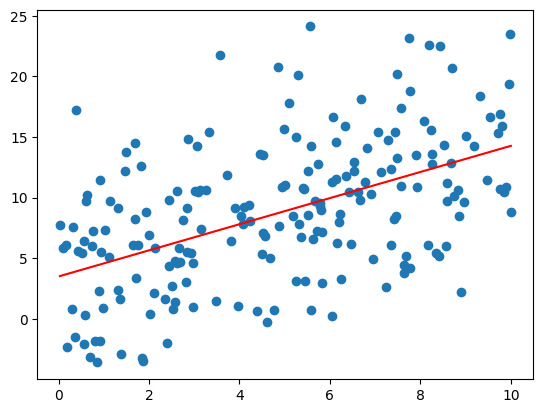

In [17]:
from matplotlib import pyplot as plt

def display_linear_regression(x_test, y_test, regressor):
    plt.figure()

    xx = np.linspace(np.min(x_test), np.max(x_test), 1000)
    yy = regressor.predict(xx[:, np.newaxis])

    plt.scatter(x_test, y_test)
    plt.plot(xx, yy, c='red')
    plt.show()

display_linear_regression(x_test, y_test, model)


### 梯度下降法

请补全代码,完成梯度下降法拟合的线性模型.

计算梯度为$grad = x^T(\hat y - y)$.

# 根据MSE的公式，这里公式应该是$\text{grad} = \frac{1}{N} x^T (\hat{y} - y)$



In [157]:
class GradientDescentRegressor(LinearRegressor):
    """
    使用梯度下降法拟合线性模型
    """
    def __init__(self,
        c_in: int, c_out: int,
        init_mean: float, init_var: float,
        bias: bool = True
    ) -> None:

        super().__init__(c_in, c_out, init_mean, init_var, bias)

    def fit_gradient_descent(self,
        x: np.ndarray, y: np.ndarray,
        step: float=0.001,
        iteration: int=100
    )->None:
        method = "patience"
        if method == "no early stopping":
            '''
            使用梯度下降法拟
            '''
            b = x.shape[0]

            if self.bias and x.shape[1] == self.c_in:
                x = np.concatenate([x, np.ones((b, 1))], axis=1)

            # === 请补全梯度计算和梯度更新机制 ===
            for idx in range(iteration):
                # grad = ?
                x_T = np.transpose(x)
                y_hat = self.predict(x, self.weight)
                grad = (1/b) * x_T @ (y_hat - y)


                # self.weight = ?
                self.weight = self.weight - step * grad
                # print(self.weight)
        elif method == "early stopping":
            tolerance = 1e-20
            prev_loss = float('inf')
            b = x.shape[0]

            for i in range(iteration):
                x_T = np.transpose(x)
                y_hat = self.predict(x, self.weight)
                grad = (1/b) * x_T @ (y_hat - y)
                loss = model.mse_loss(y_hat, y)

                # print(abs(prev_loss - loss))
                if i != 0:
                    if abs(prev_loss - loss) < tolerance:
                        print(f"Early stopping at iteration {i} with loss: {loss}")
                        break

                prev_loss = loss
                self.weight = self.weight - step * grad

        if method == "patience":
            patience = 10
            no_improve_count = 0
            b = x.shape[0]
            best_loss = 100000
            for i in range(iteration):
                x_T = np.transpose(x)
                y_hat = self.predict(x, self.weight)
                grad = (1/b) * x_T @ (y_hat - y)
                loss = self.mse_loss(y_hat, y)

                if loss < best_loss:
                    best_loss = loss
                    best_weight = self.weight.copy()
                    no_improve_count = 0  # 重新计数
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f"Stopping at iteration {i} due to no improvement")
                    break

                self.weight = self.weight - step * grad

            self.weight = best_weight  # 恢复到最佳权重


In [158]:
model = GradientDescentRegressor(c_in, c_out, 0, 0.1, True)
model.fit_gradient_descent(x_train, y_train, 0.01, 1000)

if model.bias:
    print("weight: ", model.weight[:-1, :])
    print("bias: ", model.weight[-1, :])
else:
    print("weight: ", model.weight)
print(model.mse_loss(x_test, y_test))

Stopping at iteration 14 due to no improvement
weight:  [[1.18561605]]
bias:  [1.10929151]
15.296326476382106


### 模拟退火法

请补全代码,使用模拟退火法拟合线性模型.

具体操作如下:
1. 首先拟合线性模型.
2. 为当前模型权重添加扰动.
3. 重新拟合,比较新模型是否更优.

In [174]:
from copy import deepcopy

class SimulatedAnnealing:
    def __init__(self, c_in, c_out, init_mean, init_var, bias) -> None:
        self.model = GradientDescentRegressor(c_in, c_out, init_mean, init_var, bias)

    def fit(self, x, y, step, iterations=100, rounds=10, init_temp=1.0):
        self.model.fit_gradient_descent(x, y, step, iterations)
        best_model = deepcopy(self.model)
        best_loss = self.model.mse_loss(x, y)
        print("init_loss = ", best_loss)

        temp = init_temp
        for round_idx in range(rounds):
            temp *= 0.9

            cur_model = deepcopy(best_model)
            permute = np.random.normal(0, temp, cur_model.weight.shape)  # 添加扰动
            cur_model.weight += permute
            if hasattr(cur_model, 'bias_term') and cur_model.bias_term is not None:
                cur_model.bias_term += np.random.normal(0, temp, cur_model.bias_term.shape)

            cur_loss = cur_model.mse_loss(x, y)
            print(f"#{round_idx+1}/{rounds}, temp = {temp:.3f}, best_loss = {best_loss:.4f}, cur_loss = {cur_loss:.4f}")

            if cur_loss < best_loss:
                best_model = cur_model
                best_loss = cur_loss

        self.model = best_model


model = SimulatedAnnealing(c_in, c_out, 0, 0.1, True)
model.fit(x_train, y_train, 0.01, 3, 3)

print(model.model.mse_loss(x_test, y_test))

init_loss =  17.82857330085159
#1/3, temp = 0.900, best_loss = 17.8286, cur_loss = 61.6886
#2/3, temp = 0.810, best_loss = 17.8286, cur_loss = 18.6919
#3/3, temp = 0.729, best_loss = 17.8286, cur_loss = 32.0067
19.14939269303919


init_loss =  15.058607469403428
#1/1, temp = 0.900, best_loss = 15.0586, cur_loss = 28.3684
init_loss =  14.860835635086469
#1/2, temp = 0.900, best_loss = 14.8608, cur_loss = 13.1723
#2/2, temp = 0.810, best_loss = 13.1723, cur_loss = 13.1924
init_loss =  15.365511492818287
#1/3, temp = 0.900, best_loss = 15.3655, cur_loss = 14.0206
#2/3, temp = 0.810, best_loss = 14.0206, cur_loss = 61.2113
#3/3, temp = 0.729, best_loss = 14.0206, cur_loss = 12.2949
init_loss =  14.78637510666697
#1/4, temp = 0.900, best_loss = 14.7864, cur_loss = 39.5507
#2/4, temp = 0.810, best_loss = 14.7864, cur_loss = 13.1642
#3/4, temp = 0.729, best_loss = 13.1642, cur_loss = 14.2494
#4/4, temp = 0.656, best_loss = 13.1642, cur_loss = 58.3619
init_loss =  13.78943432872451
#1/5, temp = 0.900, best_loss = 13.7894, cur_loss = 36.6604
#2/5, temp = 0.810, best_loss = 13.7894, cur_loss = 14.3455
#3/5, temp = 0.729, best_loss = 13.7894, cur_loss = 13.5308
#4/5, temp = 0.656, best_loss = 13.5308, cur_loss = 62.7550
#5

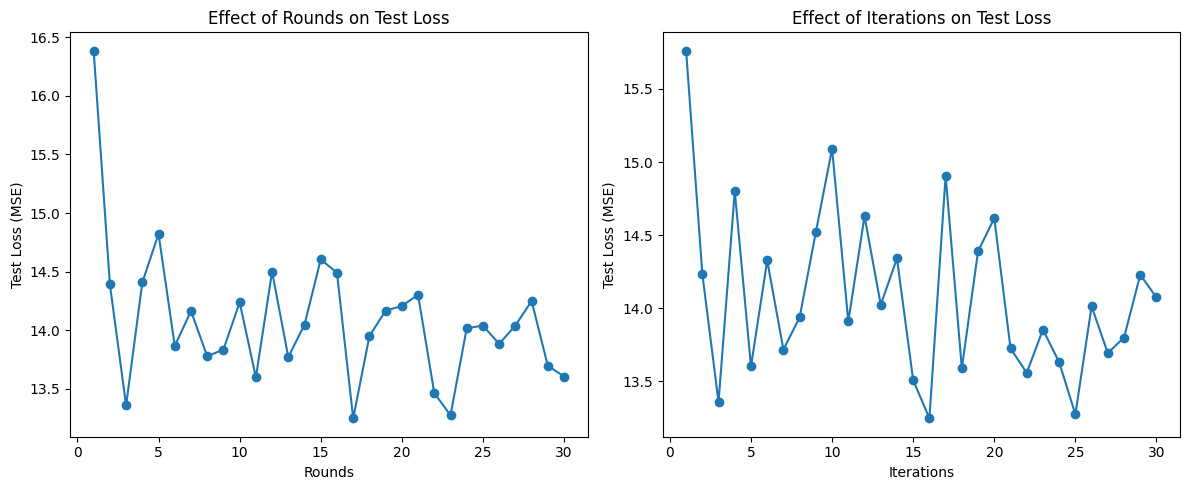

In [182]:
# 1. 固定 iterations=10，改变 rounds
rounds_values = list(range(1, 31))
losses_rounds = []
for rounds in rounds_values:
    model = SimulatedAnnealing(c_in, c_out, 0, 0.1, True)
    model.fit(x_train, y_train, 0.01, 10, rounds)
    loss = model.model.mse_loss(x_test, y_test)
    losses_rounds.append(loss)

# 2. 固定 rounds=10，改变 iterations
iterations_values = list(range(1, 31))
losses_iterations = []
for iterations in iterations_values:
    model = SimulatedAnnealing(c_in, c_out, 0, 0.1, True)
    model.fit(x_train, y_train, 0.01, iterations, 10)
    loss = model.model.mse_loss(x_test, y_test)
    losses_iterations.append(loss)

# 绘制图像
plt.figure(figsize=(12, 5))

# 绘制 rounds 的影响
plt.subplot(1, 2, 1)
plt.plot(rounds_values, losses_rounds, marker='o', linestyle='-')
plt.xlabel("Rounds")
plt.ylabel("Test Loss (MSE)")
plt.title("Effect of Rounds on Test Loss")

# 绘制 iterations 的影响
plt.subplot(1, 2, 2)
plt.plot(iterations_values, losses_iterations, marker='o', linestyle='-')
plt.xlabel("Iterations")
plt.ylabel("Test Loss (MSE)")
plt.title("Effect of Iterations on Test Loss")

plt.tight_layout()
plt.show()

Stopping at iteration 13 due to no improvement
Stopping at iteration 13 due to no improvement
Stopping at iteration 14 due to no improvement
Stopping at iteration 13 due to no improvement
Stopping at iteration 13 due to no improvement
Stopping at iteration 13 due to no improvement
Stopping at iteration 13 due to no improvement
Stopping at iteration 13 due to no improvement
Stopping at iteration 13 due to no improvement
Stopping at iteration 13 due to no improvement


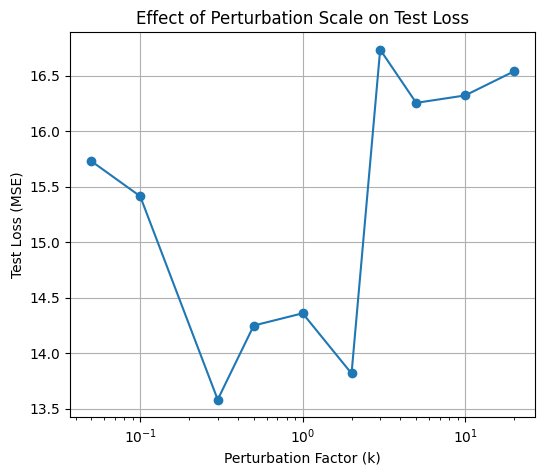

In [188]:
# 扰动幅度比例因子
perturbation_factors = [0.05, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20]
losses_perturbation = []

for k in perturbation_factors:
    class SimulatedAnnealing:
        def __init__(self, c_in, c_out, init_mean, init_var, bias) -> None:
            self.model = GradientDescentRegressor(c_in, c_out, init_mean, init_var, bias)

        def fit(self, x, y, step, iterations=10, rounds=10, init_temp=1.0):
            self.model.fit_gradient_descent(x, y, step, iterations)
            best_model = deepcopy(self.model)
            best_loss = self.model.mse_loss(x, y)

            temp = init_temp
            for round_idx in range(rounds):
                temp *= 0.9

                cur_model = deepcopy(best_model)
                permute = np.random.normal(0, k * temp, cur_model.weight.shape)  # 使用不同的扰动幅度
                cur_model.weight += permute
                if hasattr(cur_model, 'bias_term') and cur_model.bias_term is not None:
                    cur_model.bias_term += np.random.normal(0, k * temp, cur_model.bias_term.shape)

                cur_loss = cur_model.mse_loss(x, y)
                if cur_loss < best_loss:
                    best_model = cur_model
                    best_loss = cur_loss

            self.model = best_model

    # 训练模型并计算测试损失
    model = SimulatedAnnealing(c_in, c_out, 0, 0.1, True)
    model.fit(x_train, y_train, 0.01, iterations, 10)
    loss = model.model.mse_loss(x_test, y_test)
    losses_perturbation.append(loss)

# 绘制不同扰动幅度的影响
plt.figure(figsize=(6, 5))
plt.plot(perturbation_factors, losses_perturbation, marker='o', linestyle='-')
plt.xlabel("Perturbation Factor (k)")
plt.ylabel("Test Loss (MSE)")
plt.title("Effect of Perturbation Scale on Test Loss")
plt.xscale("log")  # 对数刻度，方便查看不同尺度的影响
plt.grid(True)
plt.show()

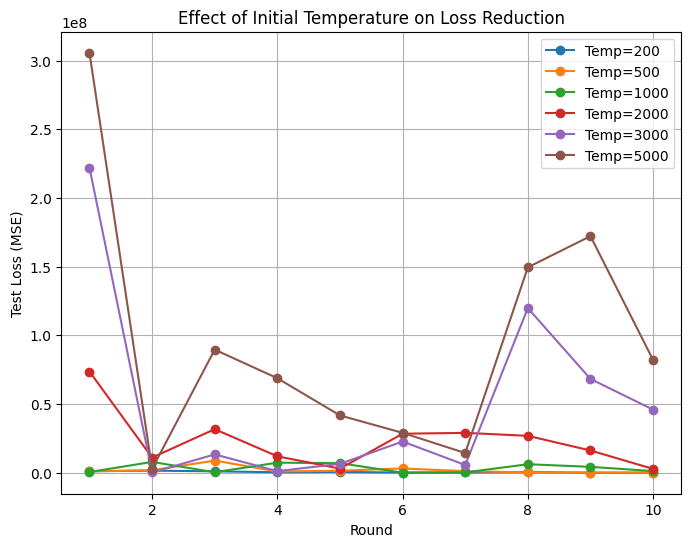

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# 假设 c_in, c_out, x_train, y_train 已经定义
initial_temps = [200, 500, 1000, 2000, 3000,5000]
rounds = 10  # 设定模拟退火轮数
losses_per_temp = {}

class SimulatedAnnealing:
    def __init__(self, c_in, c_out, init_mean, init_var, bias) -> None:
        self.model = GradientDescentRegressor(c_in, c_out, init_mean, init_var, bias)

    def fit(self, x, y, step, iterations=10, rounds=10, init_temp=1.0):
        self.model.fit_gradient_descent(x, y, step, iterations)
        best_model = deepcopy(self.model)
        best_loss = self.model.mse_loss(x, y)

        temp = init_temp
        losses_per_round = []

        for round_idx in range(rounds):
            temp *= 0.9  # 按指数方式降温
            cur_model = deepcopy(best_model)
            permute = np.random.normal(0, temp, cur_model.weight.shape)
            cur_model.weight += permute

            if hasattr(cur_model, 'bias_term') and cur_model.bias_term is not None:
                cur_model.bias_term += np.random.normal(0, temp, cur_model.bias_term.shape)

            cur_loss = cur_model.mse_loss(x, y)
            losses_per_round.append(cur_loss)

            if cur_loss < best_loss:
                best_model = cur_model
                best_loss = cur_loss

        self.model = best_model
        return losses_per_round

# 训练模型并记录每一轮的loss
for new_init_temp in initial_temps:
    model = SimulatedAnnealing(c_in, c_out, 0, 0.1, True)
    loss_history = model.fit(x_train, y_train, 0.01, 10, rounds, new_init_temp)

    if len(loss_history) == rounds:
        losses_per_temp[new_init_temp] = loss_history  # 确保列表长度匹配

# 确保所有 loss 列表长度一致
plt.figure(figsize=(8, 6))

for temp, losses in losses_per_temp.items():
    if len(losses) == rounds:
        plt.plot(range(1, rounds + 1), losses, marker='o', linestyle='-', label=f"Temp={temp}")

plt.xlabel("Round")
plt.ylabel("Test Loss (MSE)")
plt.title("Effect of Initial Temperature on Loss Reduction")
plt.legend()
plt.grid(True)
plt.show()